In [2]:
import numpy as np
from astropy.table import Table, Column
import sys

sys.path.append('../')
import gcpack
import limepy

In [3]:
def limepy_cluster(N, seed=0, **kwargs):
    """
    Return a Table [N, M], with M = 7 no. of star features.
    Features are m, x, y, z, vx, vy, vz.
    Kwargs are passed to the limepy model.
    """
    if 'phi0' not in kwargs.keys():
        phi0 = 5
    else:
        phi0 = kwargs['phi0']
        del kwargs['phi0']
    if 'g' not in kwargs.keys():
        g = 1
    else:
        g = kwargs['g']
        del kwargs['g']
    k = limepy.limepy(phi0, g, **kwargs)
    c = limepy.sample(k, seed=seed, N=N)
    tab = Table([c.m, c.x, c.y, c.z, c.vx, c.vy, c.vz], 
        names=('m', 'x', 'y', 'z', 'vx', 'vy', 'vz'), 
        meta={'name': 'cluster'})
    return tab

# Test cluster

In [4]:
tab = limepy_cluster(10000, 0, phi0=6, g=1, M=33070, rh=2.5)

In [17]:
s = gcpack.Snapshot(tab)
mmin = 0.08
mmax = 10.0
s['m'] = (mmax - mmin) * np.random.random_sample(len(s)) + mmin

In [29]:
s["ciao"] = np.ones(len(s))
s

m,x,y,z,vx,vy,vz,ciao
float64,float64,float64,float64,float64,float64,float64,float64
3.64732179444,-1.46029767514,-2.36285846709,0.0817353263353,3.60610088491,-3.89170033874,-2.01941259484,1.0
0.824840155024,-1.70121917079,0.0511920598897,3.64375106397,-1.02390787572,-1.85019233482,-1.56588068395,1.0
8.87529476356,2.97211607343,0.820799690547,-0.478086523278,-3.14040110754,-1.680713524,-1.24700848084,1.0
2.79830733082,-2.09057374946,-1.31451121998,1.2231138188,1.22157124305,1.2007509926,0.416074186404,1.0
7.6746217971,-5.77125476196,1.94707301533,-2.36069087048,1.54351361639,-1.01532847862,-2.00212148724,1.0
6.11203985832,-2.9972190502,-4.69388316157,-7.06767047684,-1.16625010403,0.984972234013,-0.620803395464,1.0
6.62642916669,0.527641238735,1.02649004533,-1.55780109493,-4.73511647042,-4.40875474631,0.887268672376,1.0
3.12521485744,1.15685077913,2.76367396834,3.82369941418,-1.19593000011,1.61561560977,-3.93648746766,1.0
5.9635739566,1.23623660574,-1.12735748714,2.07034389194,0.314308861854,0.491994990653,0.193993266991,1.0


## Plot profiles

In [5]:
import matplotlib.pyplot as plt
from matplotlib.ticker import ScalarFormatter 
plt.rcParams['figure.figsize'] = (10,8) 
plt.rcParams['xtick.labelsize'] = 15
plt.rcParams['ytick.labelsize'] = 15
plt.rcParams['axes.labelsize'] = 15
plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['xtick.major.size'] = 10
plt.rcParams['ytick.minor.size'] = 5
plt.rcParams['ytick.major.size'] = 10

In [6]:
def plot_vdp(r, sig, dsig, rh=None, units=None, savepdf=None):
    if units is not None:
        rscale = units['rstar']
        vscale = units['vstar']
        xlab = r"$r$ [pc]"
        ylab = r"$\sigma$ [km/s]"
    elif rh is not None:
        rscale = 1. / rh
        vscale = 1. / sig[0]
        xlab = r"$r/r_\mathrm{h}$"
        ylab = r"$\sigma/\sigma(0)$"

    x = r * rscale
    y = sig * vscale
    dy = dsig * vscale
    fig, ax = plt.subplots()
    ax.errorbar(x, y, yerr=dy, fmt='o')
    ax.set_xlabel(xlab)
    ax.set_ylabel(ylab)
    ax.set_xscale('log')
    ax.set_yscale('log')
    
    ax.xaxis.set_major_formatter(ScalarFormatter(useOffset=0))
    ax.yaxis.set_major_formatter(ScalarFormatter(useOffset=0))
    ax.yaxis.set_minor_formatter(ScalarFormatter(useOffset=0))
    if savepdf is not None:
        plt.savefig(savepdf)
    plt.show()

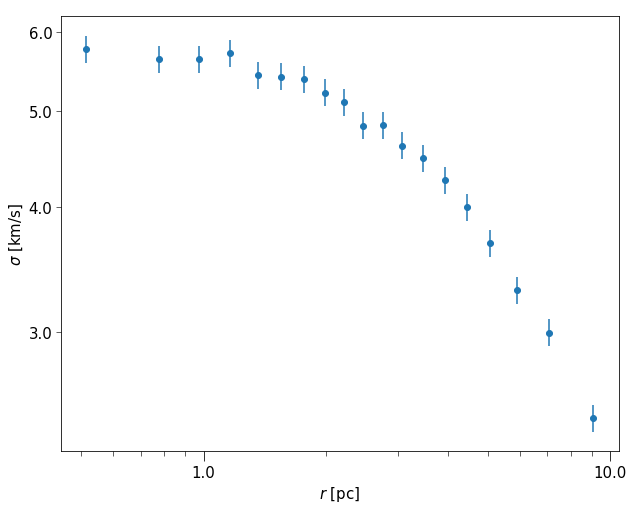

In [7]:
r, sig, dsig = gcpack.vdp(s)
plot_vdp(r, sig, dsig, units={'rstar': 1., 'vstar': 1.})

In [8]:
# plot
def plot_vdmp(m, sig, dsig, units, savepdf=None):
    x = m * units['mstar']
    y = sig / sig[0]
    dy = dsig / sig[0]
    fig, ax = plt.subplots()
    ax.errorbar(x, y, yerr=dy, fmt='o')
    ax.set_xlabel(r"$m$ [M$_\odot$]")
    ax.set_ylabel(r"$\sigma/\sigma(0)$")
    ax.set_xscale('log')
    ax.set_yscale('log')
    ax.set_xticks(np.arange(min(x), max(x), 0.2))
    ax.set_xticks(np.arange(min(x), max(x), 0.1), minor=True)
    ax.set_xticklabels([], minor=True)
    ax.xaxis.set_major_formatter(ScalarFormatter(useOffset=0))
    ax.set_yticks(np.arange(0.7,1.02,0.05))
    ax.set_yticks(np.arange(0.7,1.01,0.025), minor=True)
    ax.set_yticklabels([], minor=True)
    ax.yaxis.set_major_formatter(ScalarFormatter(useOffset=0))
    if savepdf is not None:
        plt.savefig(savepdf)
    plt.show()

In [9]:
# m, sig, dsig = gcpack.vdmp(s)
# plot_vdmp(m, sig, dsig, units={'mstar': 1})

In [10]:
# plot
def plot_scdp(r, q, rh=None, units=None, savepdf=None):
    if units is not None:
        rscale = units['rstar']
        qscale = units['rstar']**(-3.)
        xlab = r"$r$ [pc]"
        ylab = r"star count [pc$^{-3}$]"
    elif rh is not None:
        rscale = 1. / rh
        qscale = 1. / q[0]
        xlab = r"$r/r_\mathrm{h}$"
        ylab = r"star count [normalized]"

    x = r * rscale
    y = d * qscale
    fig, ax = plt.subplots()
    ax.plot(x, y, 'o')
    ax.set_xlabel(xlab)
    ax.set_ylabel(ylab)
    ax.set_xscale('log')
    ax.set_yscale('log')
    
    ax.xaxis.set_major_formatter(ScalarFormatter(useOffset=0))
    ax.yaxis.set_major_formatter(ScalarFormatter(useOffset=0))
    if savepdf is not None:
        plt.savefig(savepdf)
    plt.show()

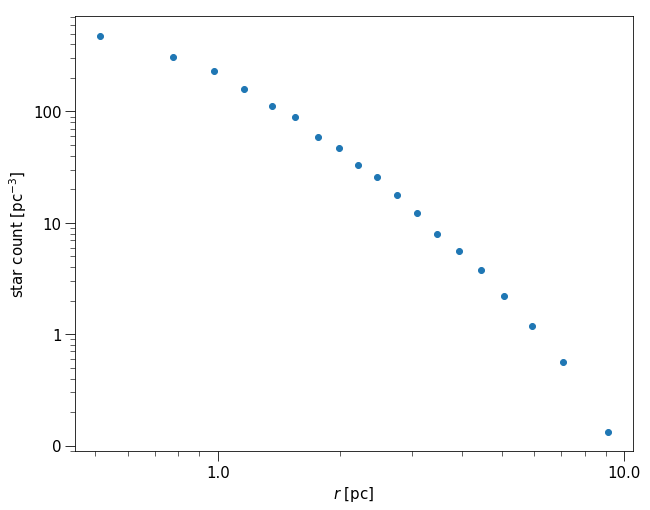

In [11]:
r, d = gcpack.dp(s)
plot_scdp(r, d, units={'rstar': 1})